In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv('AAPL_quarterly_financials.csv')
y.index = y.name
y = pd.DataFrame(y.loc['BasicEPS',:]).iloc[2:,:]
y.index =pd.to_datetime(y.index)
y= y.sort_index().fillna(0.)
y=y.loc["2004-03-31":]

# 2.) Normalize all the X data

In [3]:
from sklearn.preprocessing import StandardScaler

# 1.) Import data. Train, Test, Holdout (80%,15%,5%)

In [4]:
from pytrends.request import TrendReq

# 3.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [6]:
from sklearn.preprocessing import MinMaxScaler 
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Sillicon", "Pixel","Iphone Issues","Huawei","Phone Repair","June"]  
start_date = '2004-01-01'
end_date = '2024-01-01'

df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

# Resample the data to get quarterly averages
df_resampled = df.resample("Q").mean()

# Handling missing values by filling NaN with 0
df_resampled = df_resampled.fillna(0)

# Assuming df_resampled is your input data (X)
X = df_resampled
X = X[X.index.isin(y.index)]


y = y[y.index.isin(X.index)]
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



Longitud de X: 79
Longitud de y: 79


In [7]:
df.resample("Q").mean()

,Sillicon,Pixel,Iphone Issues,Huawei,Phone Repair,June
date,,,,,,
2004-03-31,81.000000,20.000000,0.000000,0.0,16.333333,6.666667
2004-06-30,75.000000,19.000000,0.000000,1.0,15.666667,25.666667
2004-09-30,82.000000,19.666667,0.000000,1.0,17.666667,6.666667
2004-12-31,67.333333,20.000000,0.000000,1.0,14.666667,4.666667
2005-03-31,82.000000,20.000000,0.000000,1.0,14.333333,6.333333
...,...,...,...,...,...,...
2023-03-31,47.000000,68.000000,22.333333,28.0,53.333333,10.666667
2023-06-30,23.666667,72.000000,19.000000,26.0,54.666667,43.666667
2023-09-30,24.333333,75.666667,27.000000,28.0,59.333333,11.000000


In [8]:

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.5, random_state=42)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [20]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt 


lasso = Lasso(alpha=0.02)
lasso.fit(X_scaled, y)
Coefficients = lasso.coef_



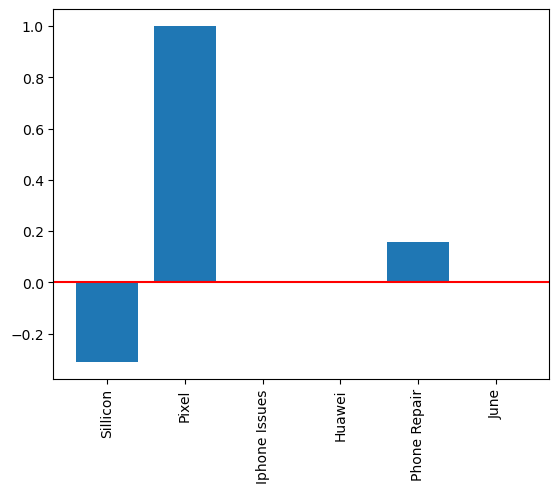

In [22]:
plt.bar(range(len(Coefficients)), Coefficients)

X_column_names = X.columns
plt.xticks(range(len(Coefficients)), X_column_names, rotation='vertical')

plt.axhline(0, color="red")

plt.show()

# 5.) Do these coefficient magnitudes make sense?

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.